Néstor Enrique Forero Herrera 

Date: 2020-09-21

e-mail: neforeroh@unal.edu.co , ne.forero172@uniandes.edu.co

# Requirements

pandas

numpy

plotly_express

plotly

lesscpy

jupyterthemes

matplotlib

sklearn



Para 2013, la metodología del modelo de segmentación de empresas se encuentraba sustentada en una evaluación del potencial de inversión de las empresas con fundamento en análisis qualitativos, empiricos y teóricos. Se tuvieron en cuenta las sugerencias de las oficinas comerciales de Proexport de acuerdo con los resultados de la encuesta realizada en octubre de 2012. Este ejercicio de segmentación incluyó además nuevas fuentes de información como Orbis BvD, Zephyr, registros de NEO, DIAN, ranking de empresas más innovadoras, entre otras fuentes para obtener resultados más robustos.

Se llevaron a cabo dos ejercicios de segmentación de empresas, el primero (Segmentación A) está compuesta de todos los sectores sin fondos de capital, el segundo contiene únicamente fondos de capital (segmentación B).

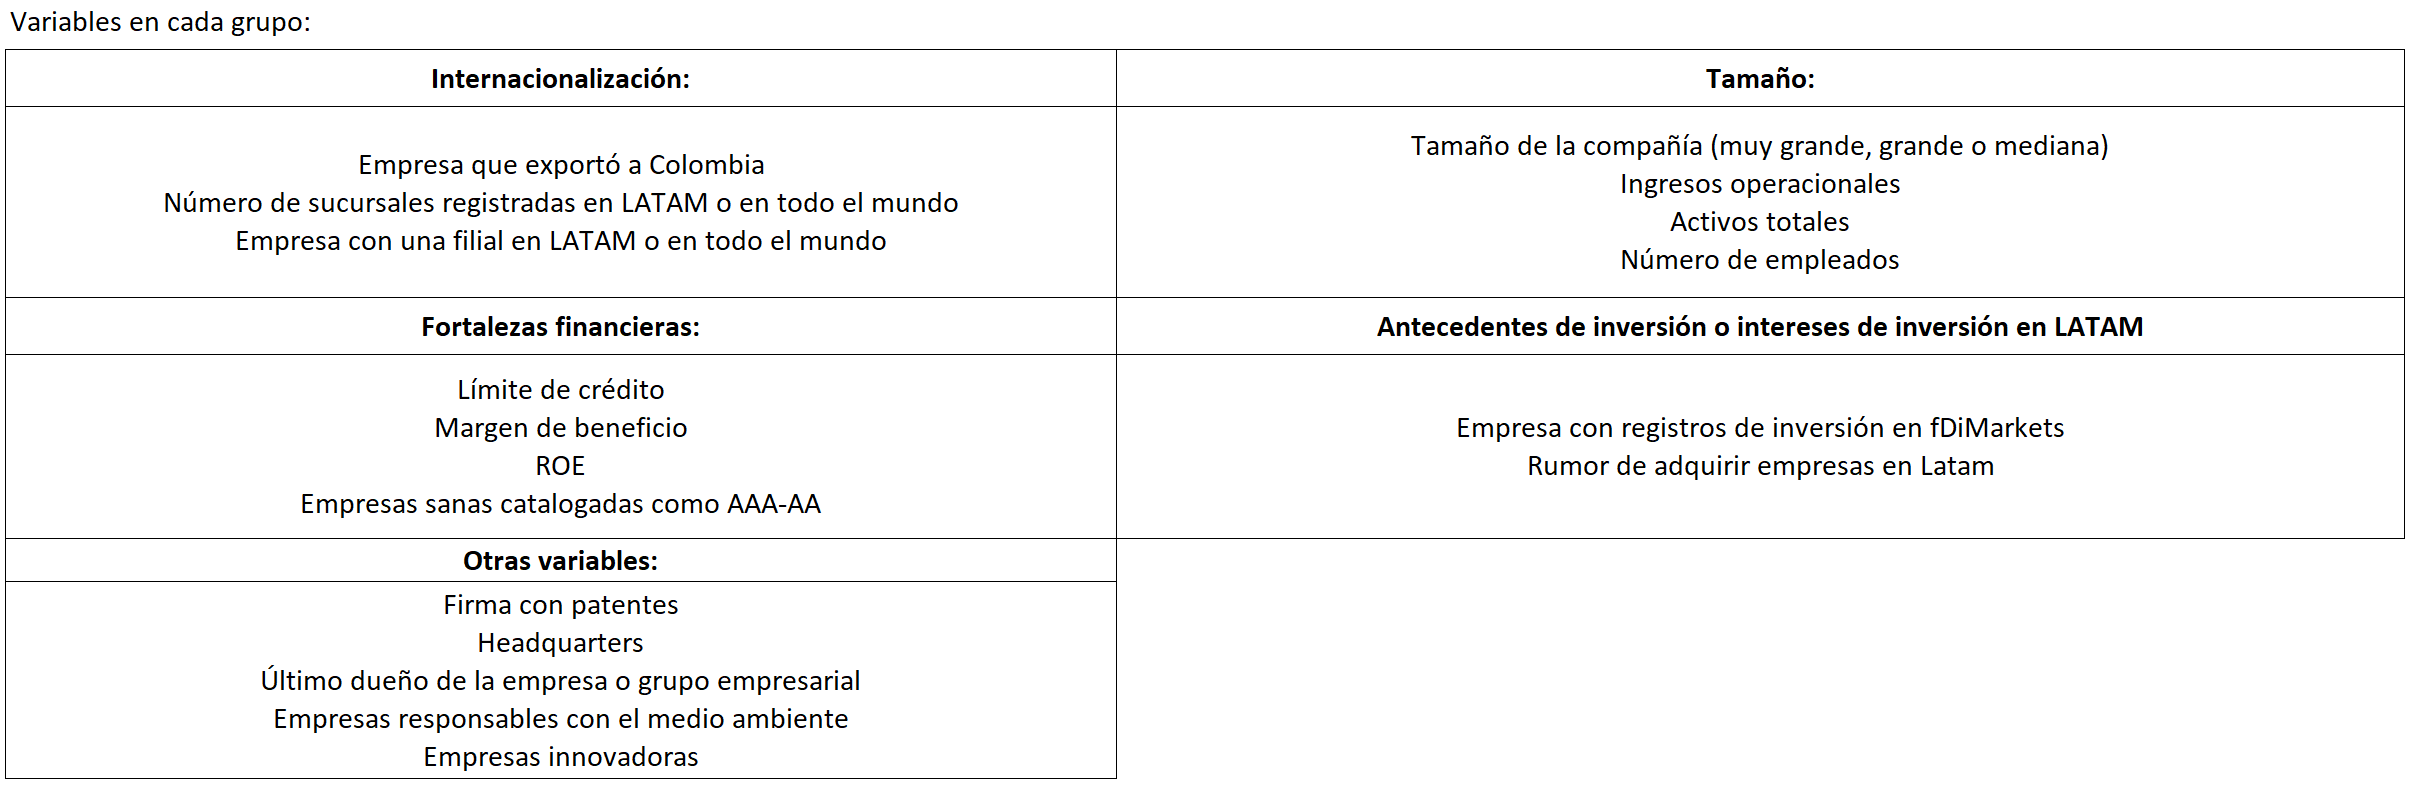

En un primer paso se hizo una revisión de la literatura sobre los principales determinantes y características de las empresas al momento de invertir en el extranjero. Se encontró que decisiones previas de inversión, el tamaño de la empresa, su proceso de internacionalización, rumores de inversión, solidez financiera, antecedentes de inversión o interés de invertir en LATAM y la productividad de la firma son estadísticamente significativos, es decir, tienen un impacto positivo al momento de invertir en el extranjero.

Estudios empíricos sobre el comercio internacional a nivel de firma, encontraron que las empresas que realizan inversión extranjera directa (IED) son generalmente grandes,  cuentan con fortalezas financieras frente a las que no invierten y son más productivas que las empresas que atienden sólo el mercado interno. Únicamente las empresas que reúnen estas y otras características son las que pueden pagar los costes de entrada asociados con la inversión extranjera directa y por lo tanto pueden servir a los mercados extranjeros.

Esta información se tuvo en cuenta para desarrollar el índice de potencial de inversión de las empresas, el cual se compone de cuatro tipos de variables clasificadas para efecto de este ejercicio en los siguientes grupos: i) Internacionalización, ii) tamaño, iii) fuerza financiera, iv) antecedentes de inversión o intenciones de inversión en LATAM. 

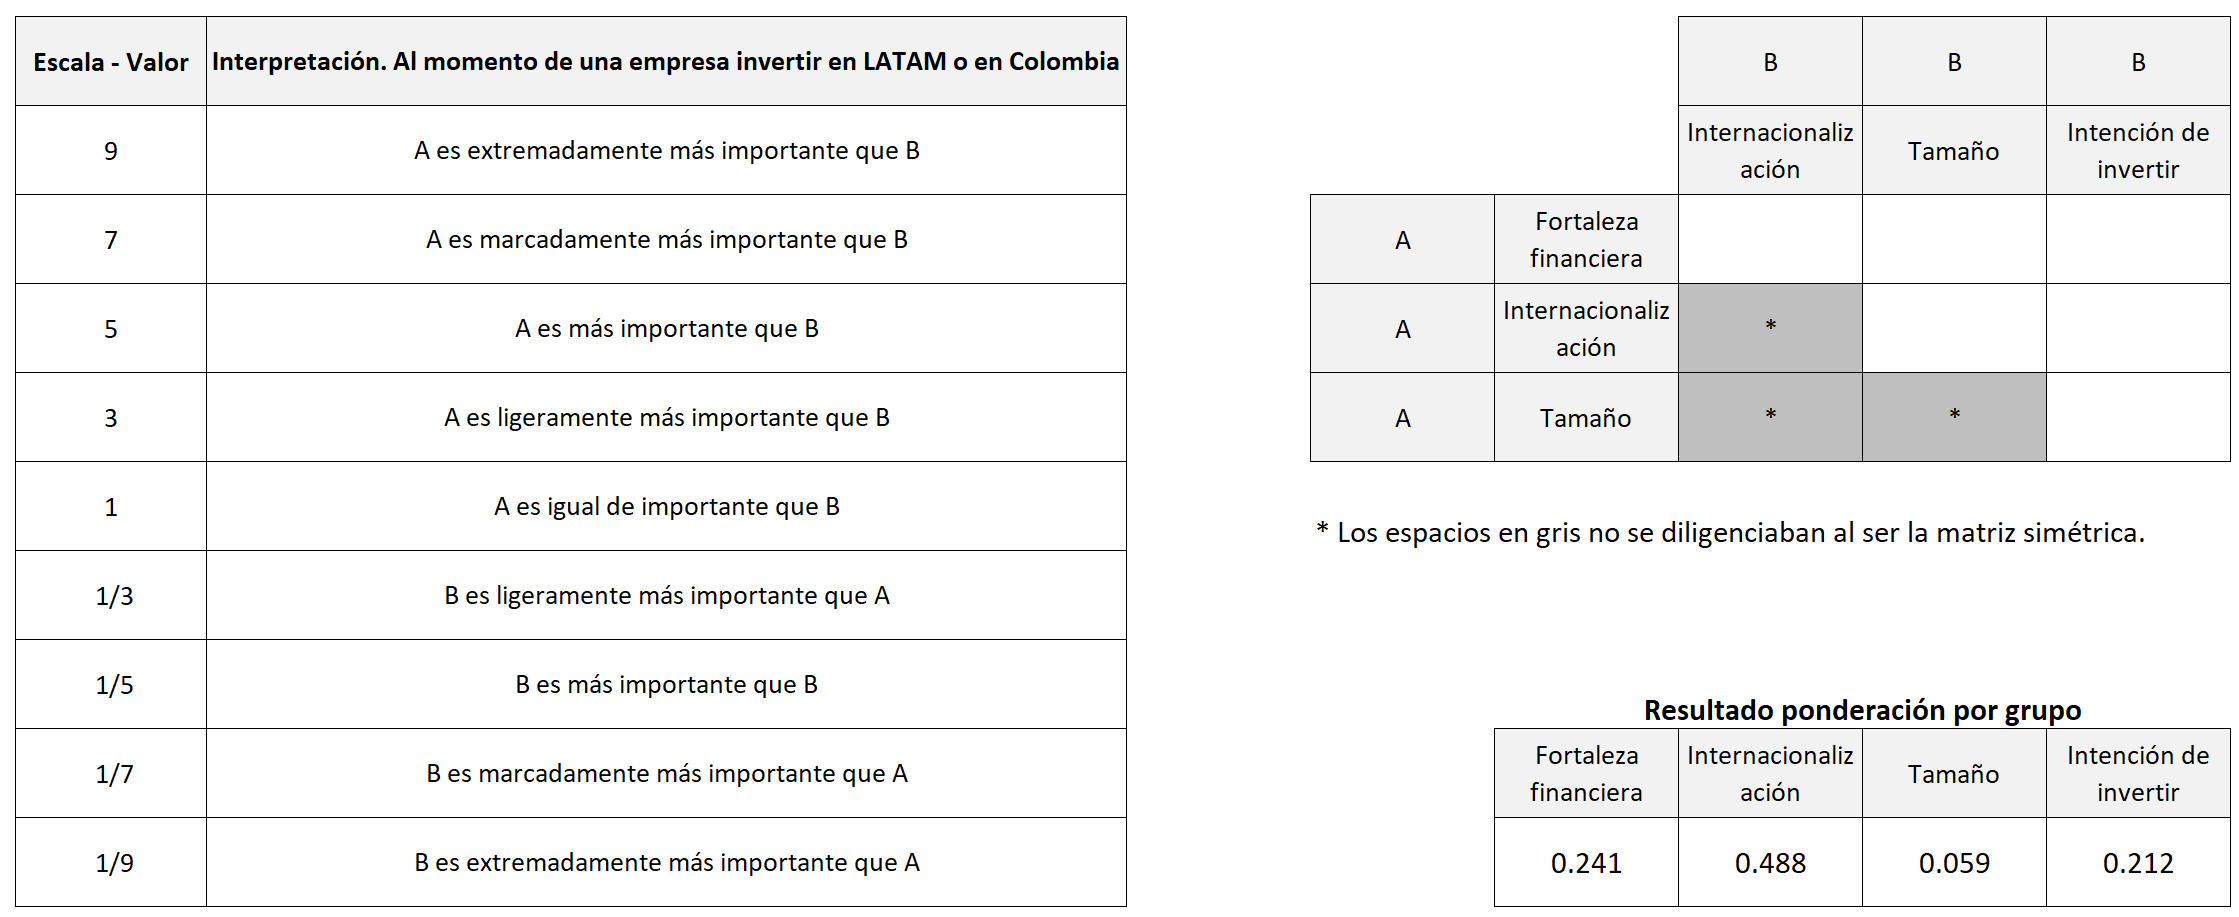

# Set up

In [1]:
# Montar el disco de Google Drive para acceder a los archivos
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Indicando la ruta de la carpeta donde están los archivos. 
%cd '/content/drive/My Drive/ProColombia/Capacitación equipo'

/content/drive/My Drive/ProColombia/Capacitación equipo


## Importando librerias

In [3]:
# Load packages
import os
import pandas as pd
import numpy as np

# This line is needed to display plots inline in Jupyter Notebook
%matplotlib inline

# Required for basic python plotting functionality
import plotly.express as px
import matplotlib.pyplot as plt

# Required for formatting dates later in the case
import datetime
import matplotlib.dates as mdates

# Required to display image inline
from IPython.display import Image

import missingno as msno

# Advanced plotting functionality with seaborn
import seaborn as sns

# Para los mapas
from pandas.io.json import json_normalize
import json

sns.set(style="whitegrid")  # can set style depending on how you'd like it to look

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# Cluster analysis - Scores

## Import libraries

In [ ]:
!pip install lesscpy

In [ ]:
!pip install --upgrade jupyterthemes

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 

## Importando los datos

In [78]:
# Importando tabla correlativa de departamentos
df_segmentacion = pd.read_excel('data/Base segmentación.xlsx', sheet_name='Hoja1')

In [79]:
df_segmentacion.head(2)

,ID,Proexport classification,Country,City,Company name,Category company,Trade description,Nace text description,Sector,Director / manager / contact full name,E-mail,Telephone number,Website address,Street,Last available year,Number employees last avail year,Operating revenue last available year\nthousands USD,Total assets last available year\nthousands USD,Profit margin last available year\n%,ROE last available year\n%,Credit limit\nthousand USD,Company that export to Colombia\nYes=1\nNo=0,Number of recorded branch locations worldwide,Company with a branch in LATAM\nYes=1\nNo=0,Number of recorded subsidiaries worldwide,Company with a subsidiary in LATAM\nYes=1\nNo=0,Company in fDiMarkets,Rumor of acquiring companies in Latam\nYes=1\nNo=0,Environmental score,Firm with patents\nYes=1\nNo=0,Innovation company\nYes=1\nNo=0,General ultimate owner of the group,Sector priority,Score,Potential
0,US19-502-8642,Services,EE.UU - D.C,Chantilly,"Engineering Consulting Services, Ltd.",Large company,Contractor of highway or street general contra...,Engineering activities and related technical c...,BPO and KPO,NaN,NaN,+1 703 471 8400,www.ecslimited.com,14026 Thunderbolt Pl,2010,NaN,100809.742,36964.626,NaN,NaN,2.005348e+06,0,6,0,6,1,0,0,0.68,1,1.0,"ENGINEERING CONSULTING SERVICES, LTD.",Proactive,0.348169,High
1,US78-218-4261,Services,EE.UU - D.C,Mc Lean,"Avineon, Inc.",Large company,Operates as a provider of computer related con...,Other information technology and computer serv...,Software and IT,NaN,NaN,+1 703 671 1900,www.avineon.com,1430 Spring Hill Rd,2012,NaN,44650.753,28141.898,NaN,NaN,1.319400e+06,0,1,0,1,0,1,0,0.42,0,0.0,"AVINEON, INC.",Proactive,0.242892,Medium


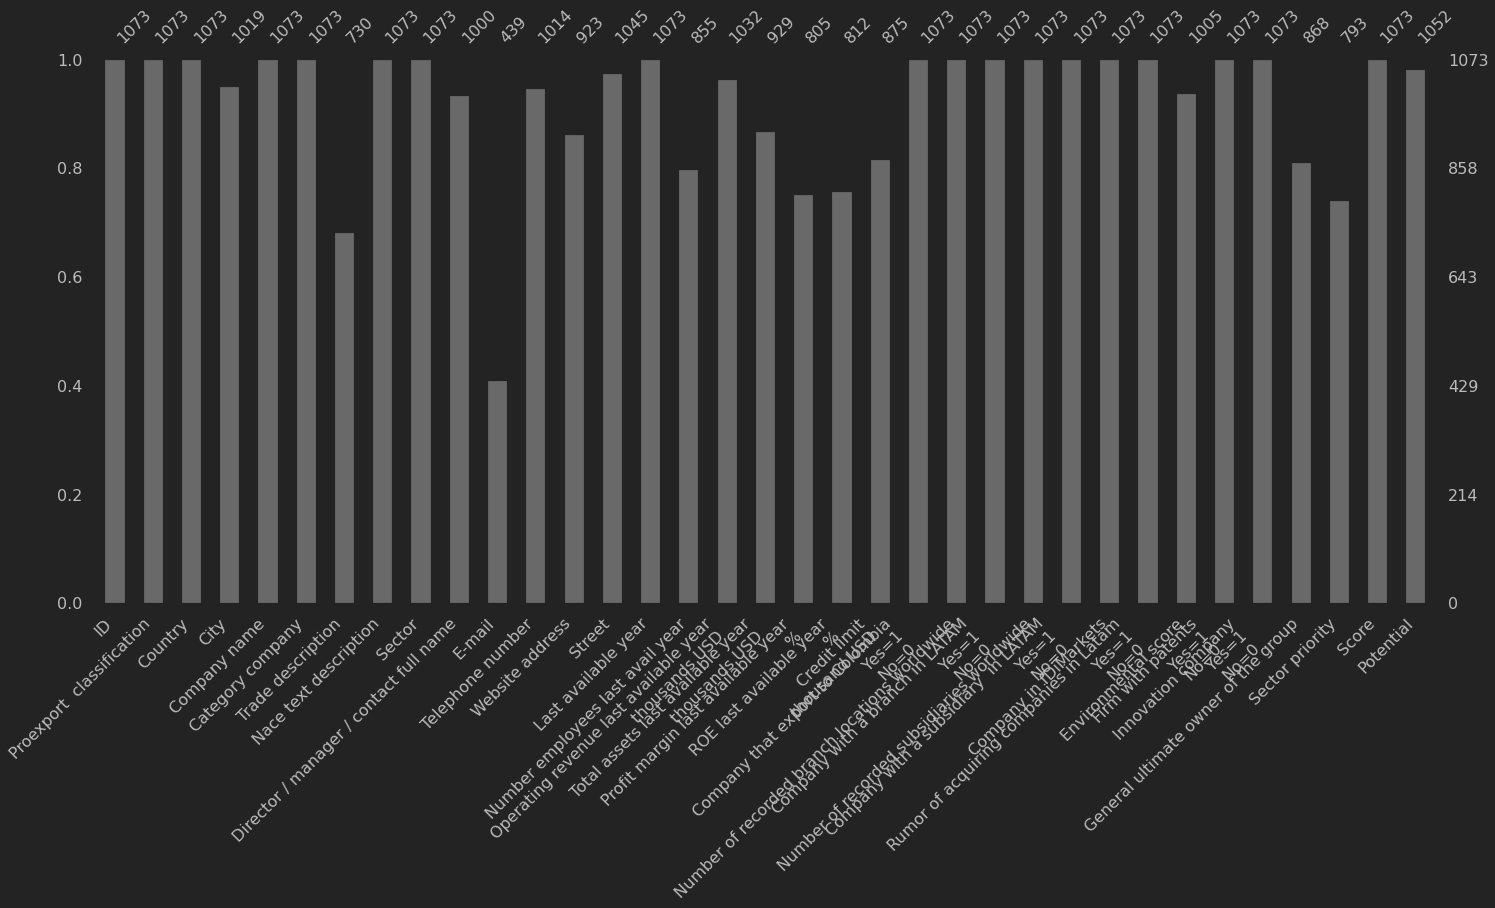

In [80]:
msno.bar( df_segmentacion )

## Datos

In [81]:
df = df_segmentacion.copy()

In [82]:
# Columnas que voy a utilizar para el análisis
columnas = ['Number employees last avail year',
       'Operating revenue last available year\nthousands USD',
       'Total assets last available year\nthousands USD',
       'Profit margin last available year\n%', 'ROE last available year\n%',
       'Credit limit\nthousand USD',
       'Company that export to Colombia\nYes=1\nNo=0',
       'Number of recorded branch locations worldwide',
       'Number of recorded subsidiaries worldwide',
       'Company with a subsidiary  in LATAM\nYes=1\nNo=0',
       'Company in fDiMarkets',
       'Rumor of acquiring companies in Latam\nYes=1\nNo=0',
       'Environmental score', 'Firm with patents\nYes=1\nNo=0',
       'Innovation company\nYes=1\nNo=0','Score']

In [83]:
# Filtrando la tabla con los valores que quiero mantener
df = df[ columnas ]

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 16 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Number employees last avail year                     855 non-null    float64
 1   Operating revenue last available year
thousands USD  1032 non-null   float64
 2   Total assets last available year
thousands USD       929 non-null    float64
 3   Profit margin last available year
%                  805 non-null    float64
 4   ROE last available year
%                            812 non-null    float64
 5   Credit limit
thousand USD                            875 non-null    float64
 6   Company that export to Colombia
Yes=1
No=0           1073 non-null   int64  
 7   Number of recorded branch locations worldwide        1073 non-null   int64  
 8   Number of recorded subsidiaries worldwide            1073 non-null  

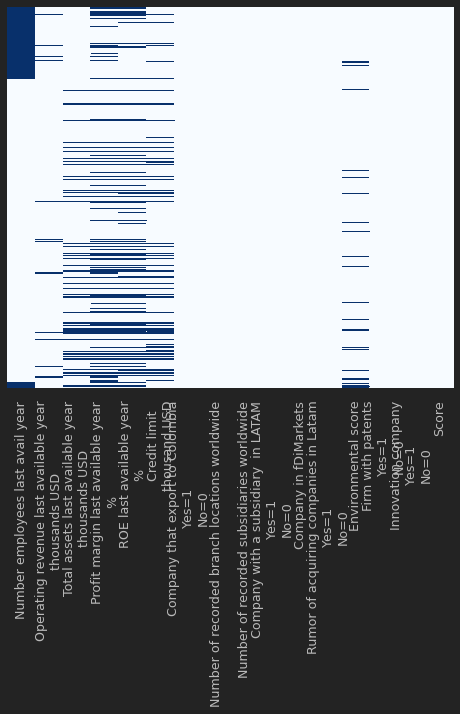

In [85]:
# Let's see if we have any missing data, luckily we don't have many!
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [86]:
# Sumando los valores nulos por variables
df.isnull().sum()
# Si hay variables sin valor, debo asignarles un número o eliminarlas. 

Number employees last avail year                        218
Operating revenue last available year\nthousands USD     41
Total assets last available year\nthousands USD         144
Profit margin last available year\n%                    268
ROE last available year\n%                              261
Credit limit\nthousand USD                              198
Company that export to Colombia\nYes=1\nNo=0              0
Number of recorded branch locations worldwide             0
Number of recorded subsidiaries worldwide                 0
Company with a subsidiary  in LATAM\nYes=1\nNo=0          0
Company in fDiMarkets                                     0
Rumor of acquiring companies in Latam\nYes=1\nNo=0        0
Environmental score                                      68
Firm with patents\nYes=1\nNo=0                            0
Innovation company\nYes=1\nNo=0                           0
Score                                                     0
dtype: int64

In [87]:
# Revisando si hay observaciones duplicadas
df.duplicated().sum()

1

In [88]:
# Colocando el valor de cero a las filas que no tienen valor. NO necesariamente es la mejor opción pero para el ejercicio práctico, nos sirve. 
df = df.fillna(-1)

In [89]:
# Verificando que todo esté correcto
df.isnull().sum()

Number employees last avail year                        0
Operating revenue last available year\nthousands USD    0
Total assets last available year\nthousands USD         0
Profit margin last available year\n%                    0
ROE last available year\n%                              0
Credit limit\nthousand USD                              0
Company that export to Colombia\nYes=1\nNo=0            0
Number of recorded branch locations worldwide           0
Number of recorded subsidiaries worldwide               0
Company with a subsidiary  in LATAM\nYes=1\nNo=0        0
Company in fDiMarkets                                   0
Rumor of acquiring companies in Latam\nYes=1\nNo=0      0
Environmental score                                     0
Firm with patents\nYes=1\nNo=0                          0
Innovation company\nYes=1\nNo=0                         0
Score                                                   0
dtype: int64

In [90]:
# Contando la cantidad de variables que vamos a utilizar
n = len(df.columns)
n

16

In [91]:
df.dtypes

Number employees last avail year                        float64
Operating revenue last available year\nthousands USD    float64
Total assets last available year\nthousands USD         float64
Profit margin last available year\n%                    float64
ROE last available year\n%                              float64
Credit limit\nthousand USD                              float64
Company that export to Colombia\nYes=1\nNo=0              int64
Number of recorded branch locations worldwide             int64
Number of recorded subsidiaries worldwide                 int64
Company with a subsidiary  in LATAM\nYes=1\nNo=0          int64
Company in fDiMarkets                                     int64
Rumor of acquiring companies in Latam\nYes=1\nNo=0        int64
Environmental score                                     float64
Firm with patents\nYes=1\nNo=0                            int64
Innovation company\nYes=1\nNo=0                         float64
Score                                   

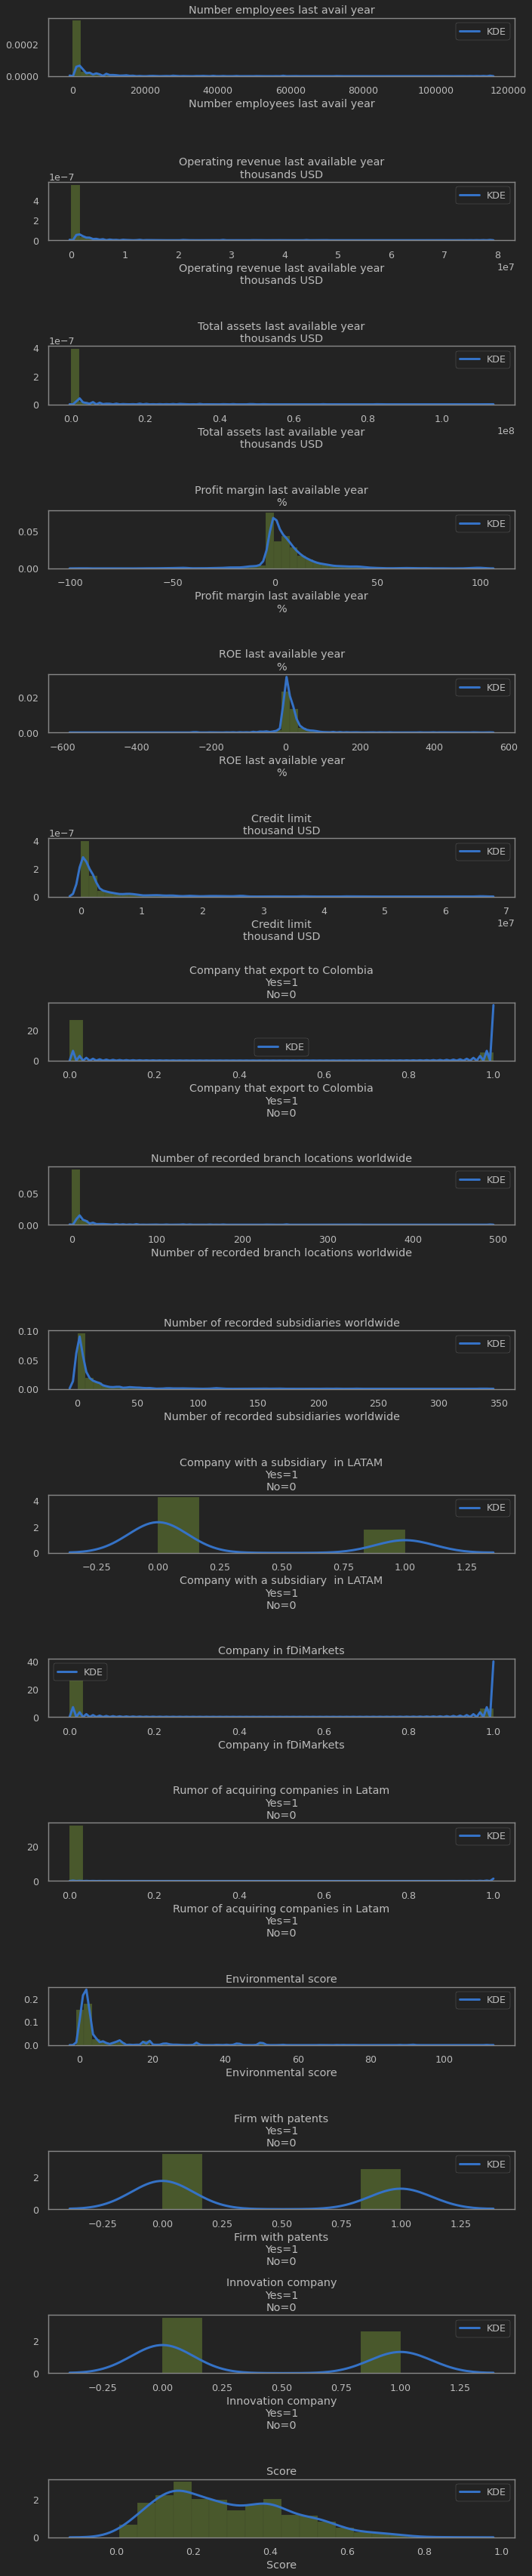

In [92]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
    # Voy a graficar cada una de las 16 variables. 
  plt.subplot(17, 1, i+1)
  sns.distplot(df[df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(df.columns[i])

plt.tight_layout()

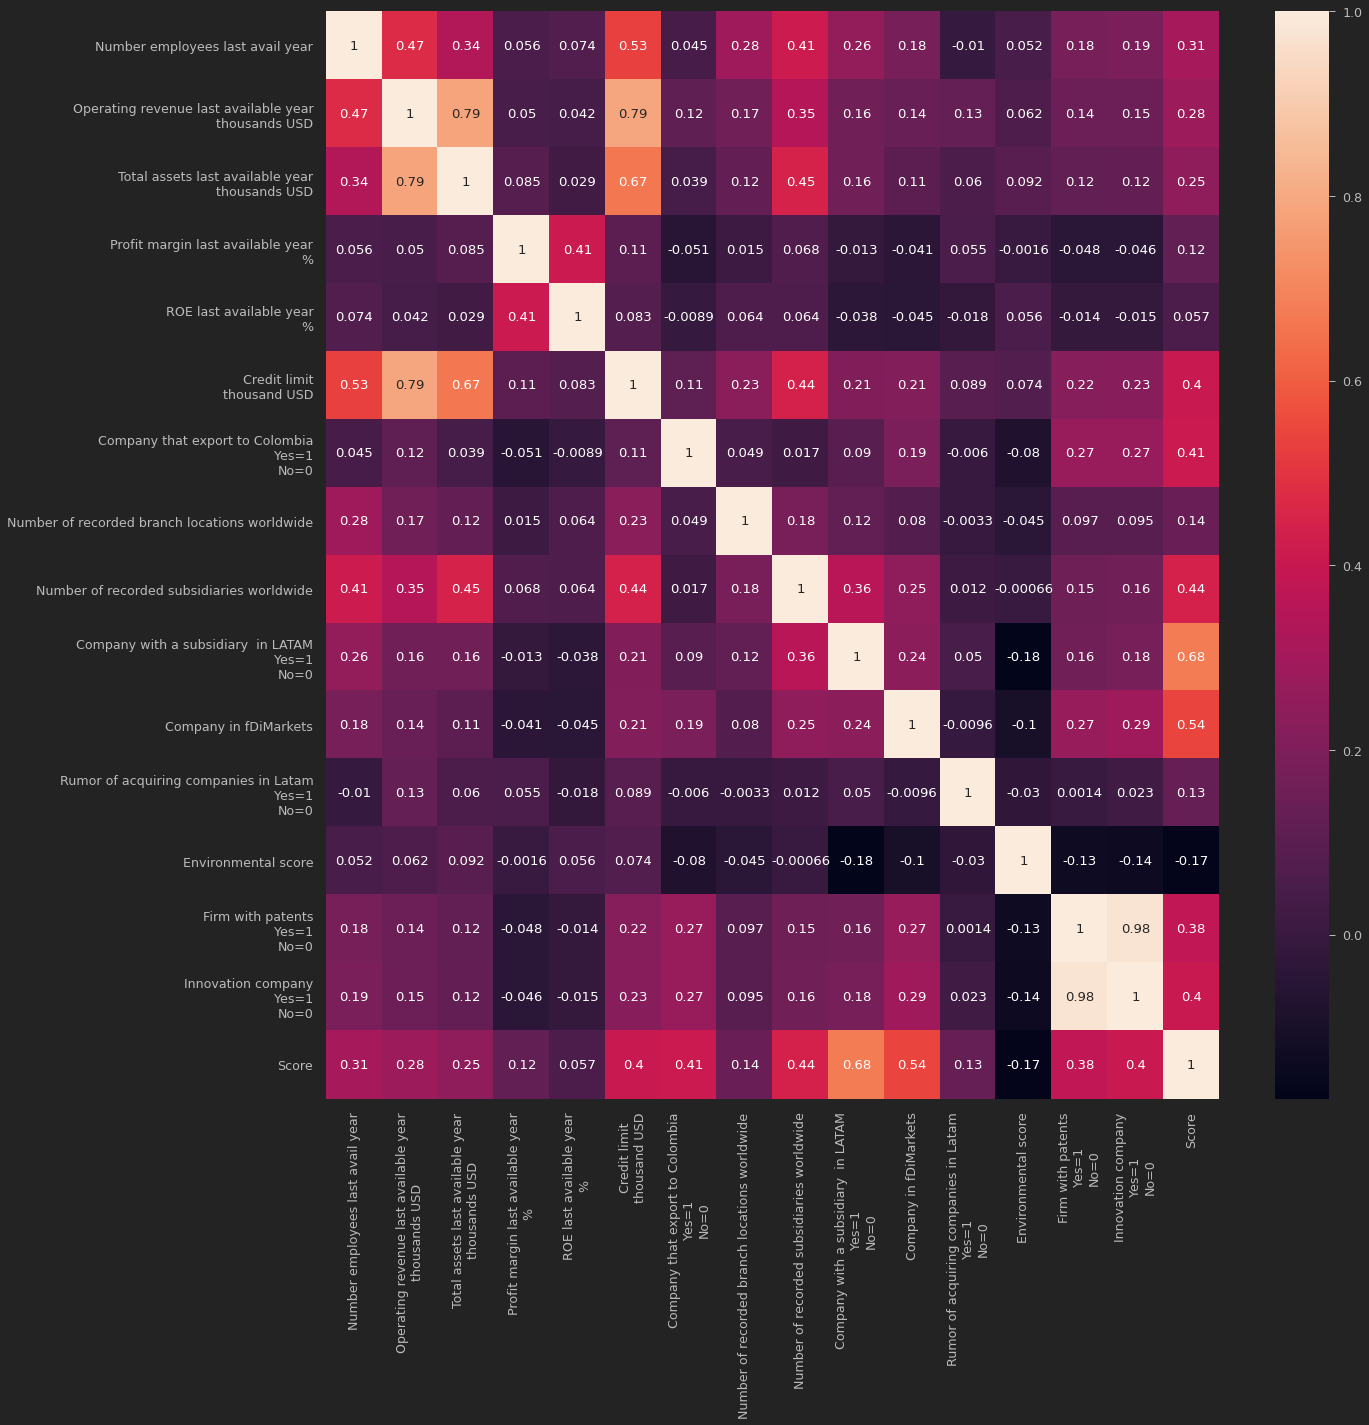

In [93]:
# Obtain the correlation matrix between features
correlations = df.corr()
f, ax = plt.subplots(figsize = (20, 20))
# annot = True . 
sns.heatmap(correlations, annot = True)

## Encontrar el número óptimo de clústers

In [94]:
# Primero escalamos o normalizamos cada una de las variables
scaler = StandardScaler()
df_scaled = scaler.fit_transform( df )

In [95]:
df_scaled.shape

(1073, 16)

In [96]:
df_scaled

array([[-0.32852707, -0.22626158, -0.2311052 , ...,  1.17437534,
         1.1510991 ,  0.36352637],
       [-0.32852707, -0.23982174, -0.23239611, ..., -0.85151652,
        -0.87038918, -0.2811703 ],
       [-0.32852707, -0.18511023, -0.21200028, ..., -0.85151652,
        -0.87038918, -0.85002351],
       ...,
       [-0.32852707, -0.25046204, -0.23368323, ..., -0.85151652,
        -0.87038918, -1.33048561],
       [-0.32852707, -0.24905911, -0.23651387, ..., -0.85151652,
        -0.87038918, -1.33466208],
       [-0.32852707, -0.25060312, -0.23573805, ..., -0.85151652,
        -0.87038918, -1.44271063]])

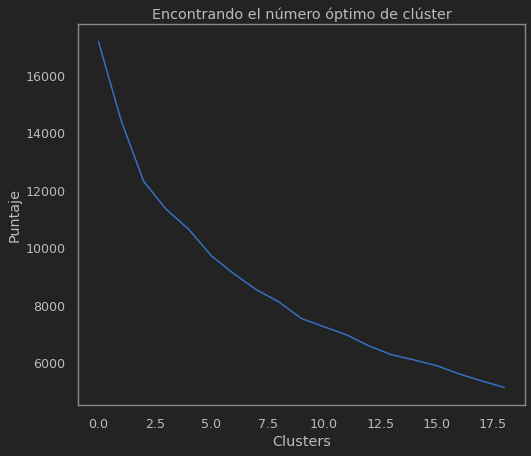

In [97]:
scores_1 = []
# Cantidad de interacciones. 
range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit( df_scaled )
    scores_1.append(kmeans.inertia_)

plt.plot(scores_1, 'bx-')
plt.title('Encontrando el número óptimo de clúster')
plt.xlabel('Clusters')
plt.ylabel('Puntaje') 
plt.show()

In [100]:
# Vamos a hacer 7 grupos
kmeans = KMeans(7)
kmeans.fit( df_scaled )
# labels_ para mostrar los labels (cluster) asociado a cada punto. 
labels = kmeans.labels_

In [101]:
kmeans.cluster_centers_.shape

(7, 16)

In [102]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers  

,Number employees last avail year,Operating revenue last available year\nthousands USD,Total assets last available year\nthousands USD,Profit margin last available year\n%,ROE last available year\n%,Credit limit\nthousand USD,Company that export to Colombia\nYes=1\nNo=0,Number of recorded branch locations worldwide,Number of recorded subsidiaries worldwide,Company with a subsidiary in LATAM\nYes=1\nNo=0,Company in fDiMarkets,Rumor of acquiring companies in Latam\nYes=1\nNo=0,Environmental score,Firm with patents\nYes=1\nNo=0,Innovation company\nYes=1\nNo=0,Score
0,0.456750,0.122759,0.103629,-0.023571,0.014780,0.392367,1.134154,0.248250,0.615477,1.143610,1.353819,-0.081035,-0.279095,1.072352,1.078384,1.515259
1,-0.233748,-0.196001,-0.189331,0.055856,0.071252,-0.298316,-0.222756,-0.140505,-0.325990,-0.643197,-0.361199,-0.081035,0.204070,-0.851517,-0.870389,-0.686667
2,3.811826,4.691560,5.138729,0.477743,0.201153,4.282049,0.150813,0.858286,2.855473,0.855392,0.793575,-0.081035,0.957413,0.621859,0.599784,1.283878
3,-0.138801,-0.107445,-0.106059,-0.091557,-0.039138,-0.066201,-0.020630,-0.101353,-0.173174,-0.307300,-0.126779,-0.081035,-0.107393,1.147453,1.144383,-0.096369
4,-0.124399,1.594244,0.745823,0.680476,-0.218596,1.102672,-0.073628,-0.040994,0.150090,0.612764,-0.118297,12.340410,-0.367676,0.016723,0.284747,1.662272
5,1.522178,0.651439,0.402679,-0.101051,0.090130,1.501755,-0.453451,11.630354,1.067641,0.675562,0.027603,-0.081035,-0.231817,0.364019,0.342504,0.320970
6,-0.032981,-0.086939,-0.112212,-0.070167,-0.191788,-0.047255,-0.357119,-0.115751,0.345264,1.475099,-0.002000,-0.081035,-0.291936,-0.851517,-0.797147,0.677200


In [103]:
# Para entender lo que significan estos números, realicemos una transformación inversa
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [ df.columns ])
cluster_centers

# Estas son las estadísticas para cada uno de los grupos. 

,Number employees last avail year,Operating revenue last available year\nthousands USD,Total assets last available year\nthousands USD,Profit margin last available year\n%,ROE last available year\n%,Credit limit\nthousand USD,Company that export to Colombia\nYes=1\nNo=0,Number of recorded branch locations worldwide,Number of recorded subsidiaries worldwide,Company with a subsidiary in LATAM\nYes=1\nNo=0,Company in fDiMarkets,Rumor of acquiring companies in Latam\nYes=1\nNo=0,Environmental score,Firm with patents\nYes=1\nNo=0,Innovation company\nYes=1\nNo=0,Score
0,5707.359712,1.546267e+06,2.324710e+06,5.833094,12.762878,6.762664e+06,0.597122,13.165468,31.007194,8.129496e-01,0.719424,-2.602085e-18,2.653813,9.496403e-01,9.640288e-01,0.536243
1,687.969631,2.261343e+05,3.224684e+05,7.086920,15.794534,1.464454e+06,0.086768,2.958785,3.537961,-1.720846e-15,0.047722,9.540979e-18,8.705748,-2.442491e-15,2.942091e-15,0.176676
2,30096.181818,2.046781e+07,3.673715e+07,13.746818,22.768182,3.660031e+07,0.227273,29.181818,96.363636,6.818182e-01,0.500000,-8.673617e-19,18.141818,7.272727e-01,7.272727e-01,0.498460
3,1378.159468,5.928867e+05,8.915957e+05,4.759867,9.868339,3.244999e+06,0.162791,3.986711,7.996678,1.528239e-01,0.139535,2.602085e-17,4.804485,9.867110e-01,9.966777e-01,0.273069
4,1482.857143,7.640376e+06,6.713789e+06,16.947143,0.234286,1.221139e+07,0.142857,5.571429,17.428571,5.714286e-01,0.142857,1.000000e+00,1.544286,4.285714e-01,5.714286e-01,0.560250
5,13452.200000,3.735779e+06,4.368570e+06,4.610000,16.808000,1.527275e+07,0.000000,312.000000,44.200000,6.000000e-01,0.200000,0.000000e+00,3.246000,6.000000e-01,6.000000e-01,0.341220
6,2147.391304,6.778108e+05,8.495432e+05,5.097536,1.673406,3.390337e+06,0.036232,3.608696,23.123188,9.637681e-01,0.188406,-2.602085e-18,2.492971,1.165734e-15,3.623188e-02,0.399391


In [104]:
labels.shape # Etiquetas asociadas a cada punto de datos

(1073,)

In [105]:
labels.max()

6

In [106]:
labels.min()

0

In [107]:
# Vamos a hacer las predicciones de las etiquetas
y_kmeans = kmeans.fit_predict( df_scaled )
y_kmeans

array([3, 2, 2, ..., 2, 2, 2], dtype=int32)

In [108]:
# Concatenar las etiquetas de los clústeres a nuestro marco de datos original
df_cluster = pd.concat([ df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster.head()

,Number employees last avail year,Operating revenue last available year\nthousands USD,Total assets last available year\nthousands USD,Profit margin last available year\n%,ROE last available year\n%,Credit limit\nthousand USD,Company that export to Colombia\nYes=1\nNo=0,Number of recorded branch locations worldwide,Number of recorded subsidiaries worldwide,Company with a subsidiary in LATAM\nYes=1\nNo=0,Company in fDiMarkets,Rumor of acquiring companies in Latam\nYes=1\nNo=0,Environmental score,Firm with patents\nYes=1\nNo=0,Innovation company\nYes=1\nNo=0,Score,cluster
0,-1.0,100809.742,36964.626,-1.0,-1.0,2.005348e+06,0,6,6,1,0,0,0.68,1,1.0,0.348169,3
1,-1.0,44650.753,28141.898,-1.0,-1.0,1.319400e+06,0,1,1,0,1,0,0.42,0,0.0,0.242892,1
2,-1.0,271236.770,167537.340,-1.0,-1.0,1.979100e+06,0,0,4,0,0,0,1.78,0,0.0,0.150000,1
3,-1.0,32681.370,13134.270,-1.0,-1.0,1.306206e+06,0,1,0,0,0,0,1.78,0,0.0,0.130000,1
4,-1.0,3781503.000,1840261.000,-1.0,-1.0,1.253430e+07,0,40,0,0,0,0,1.78,0,0.0,0.120000,1


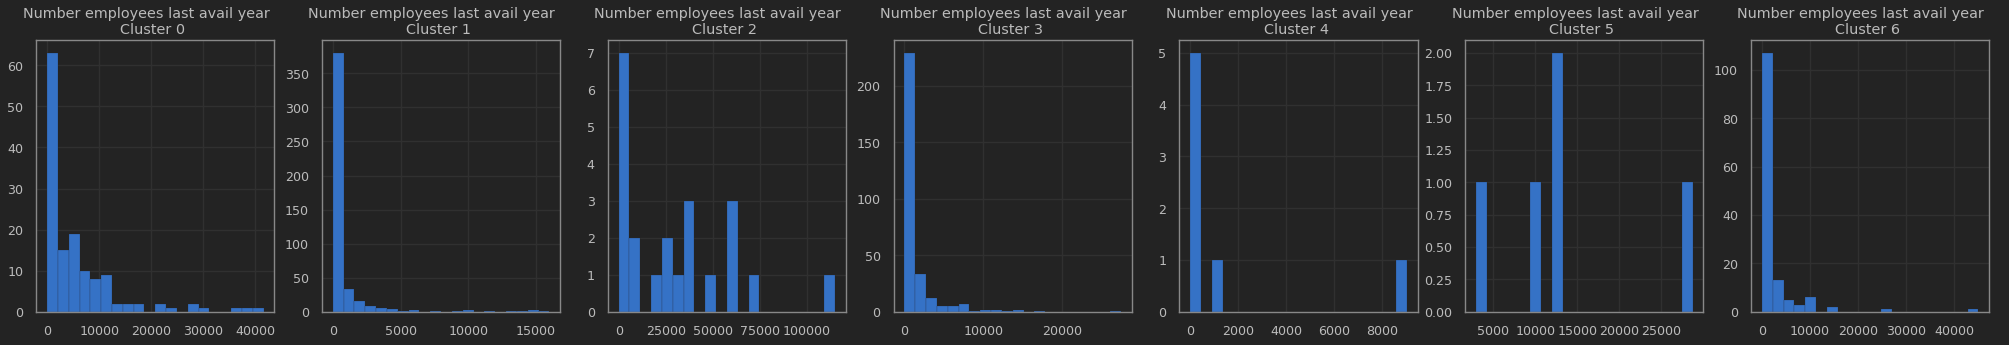

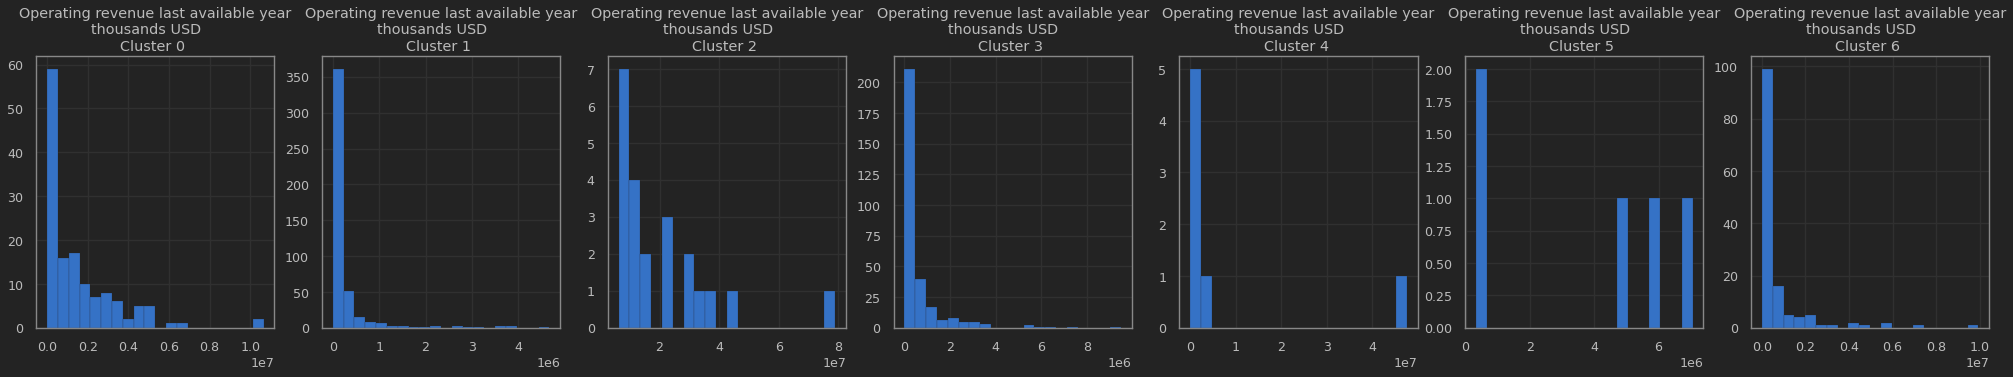

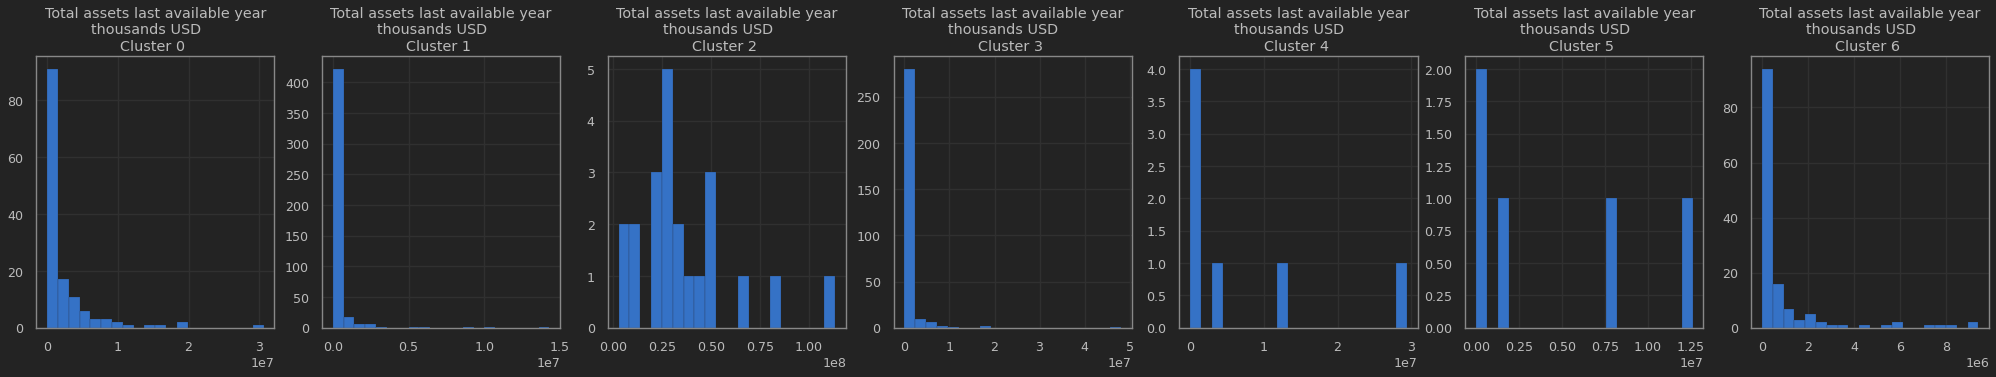

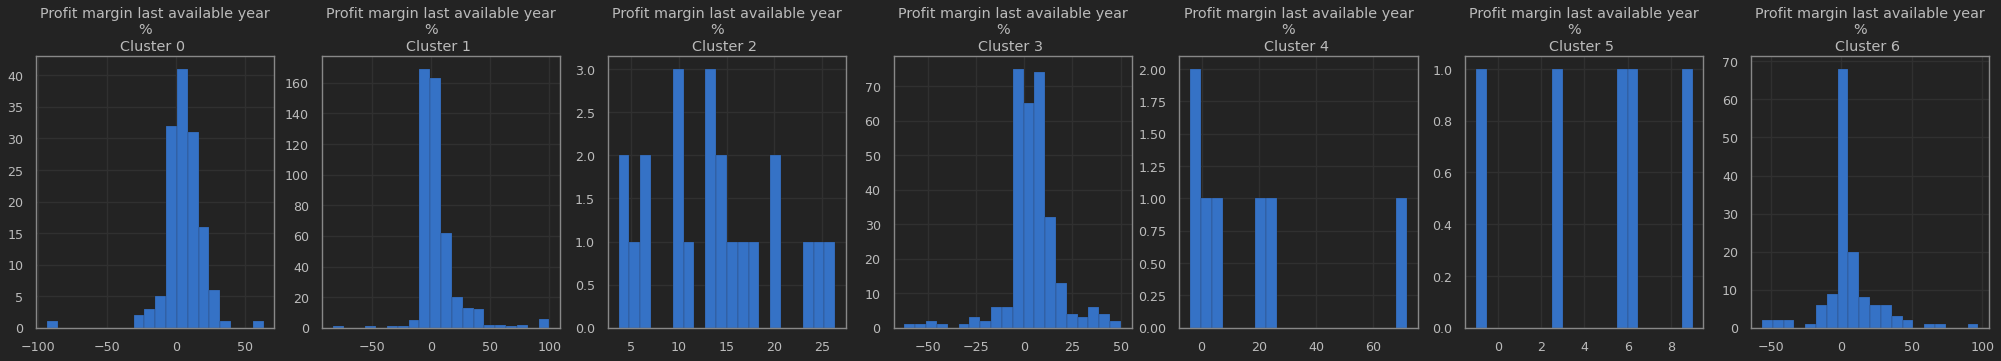

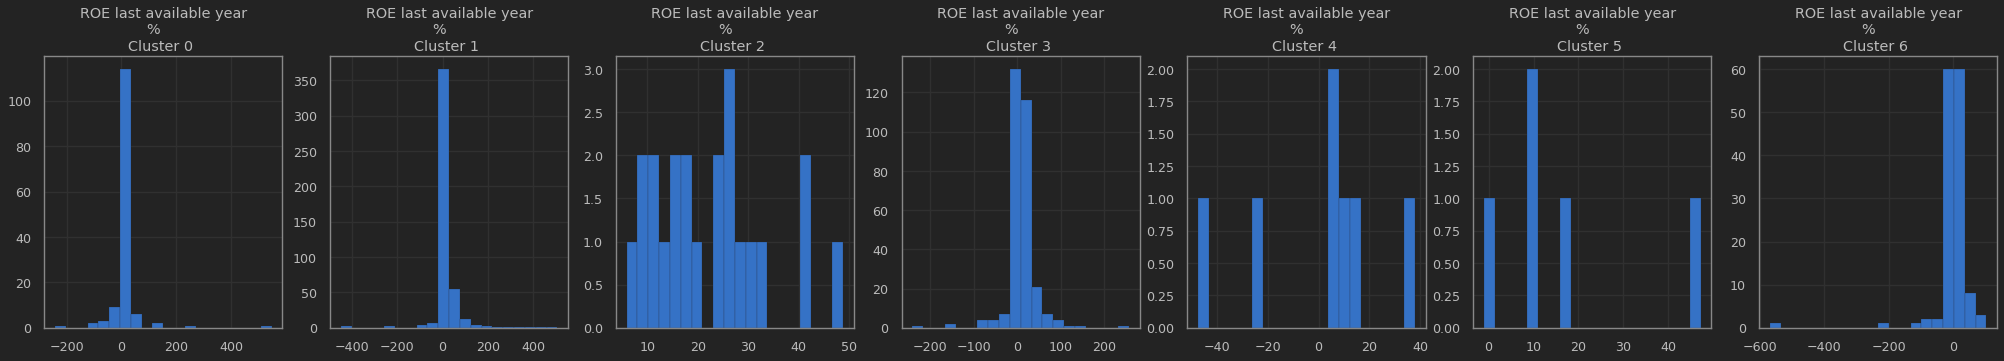

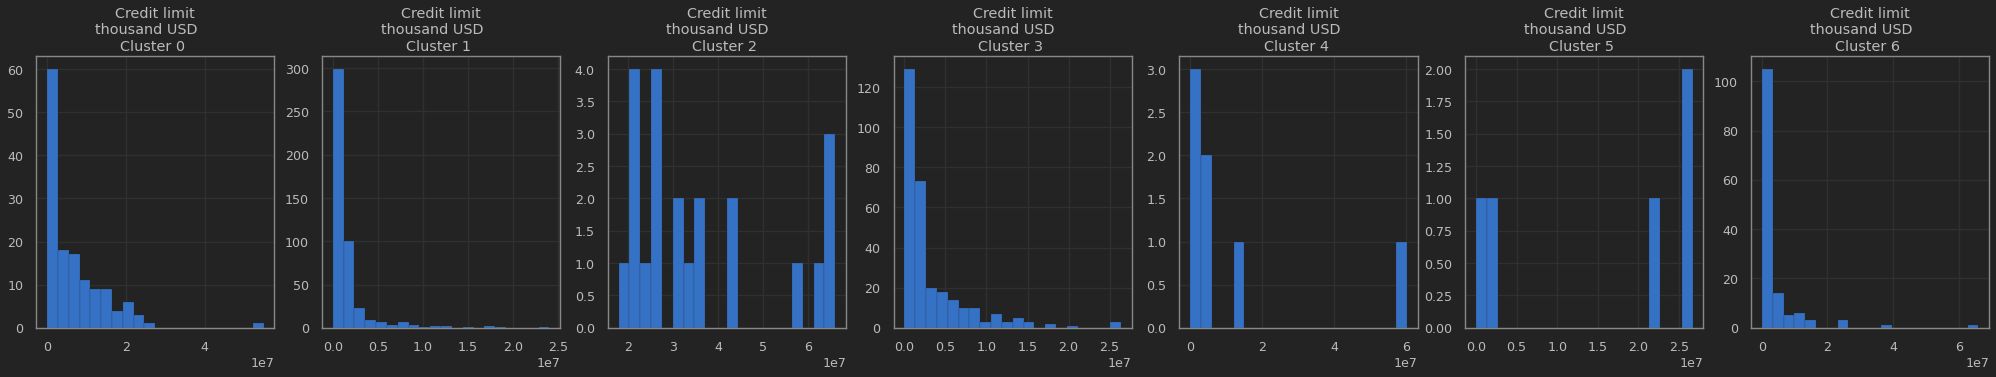

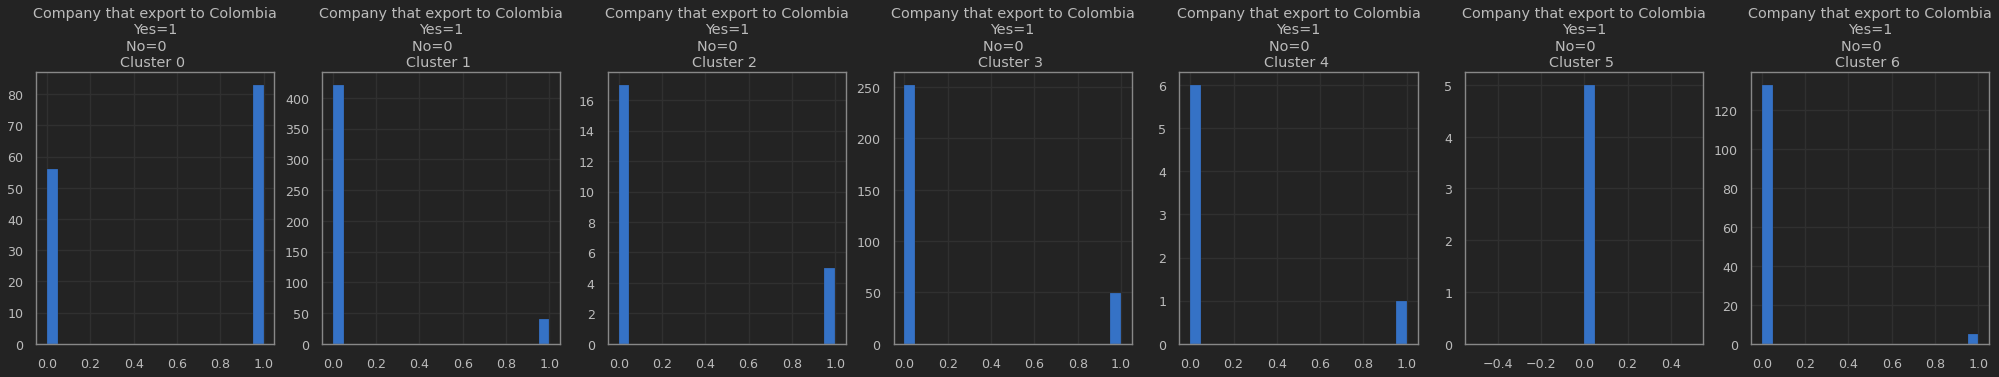

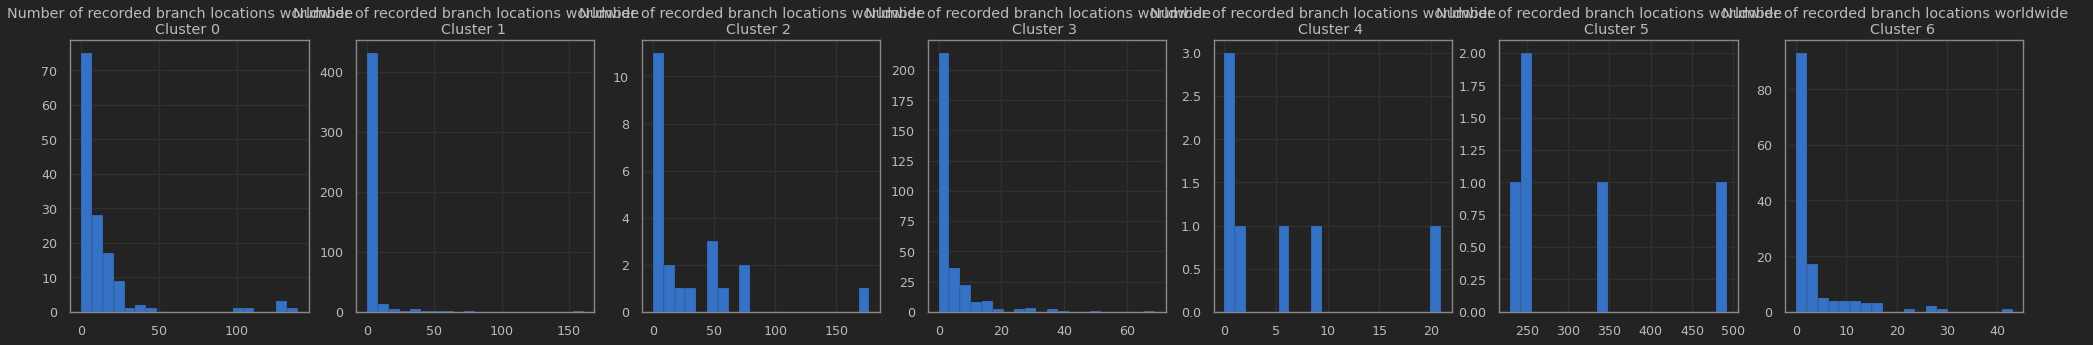

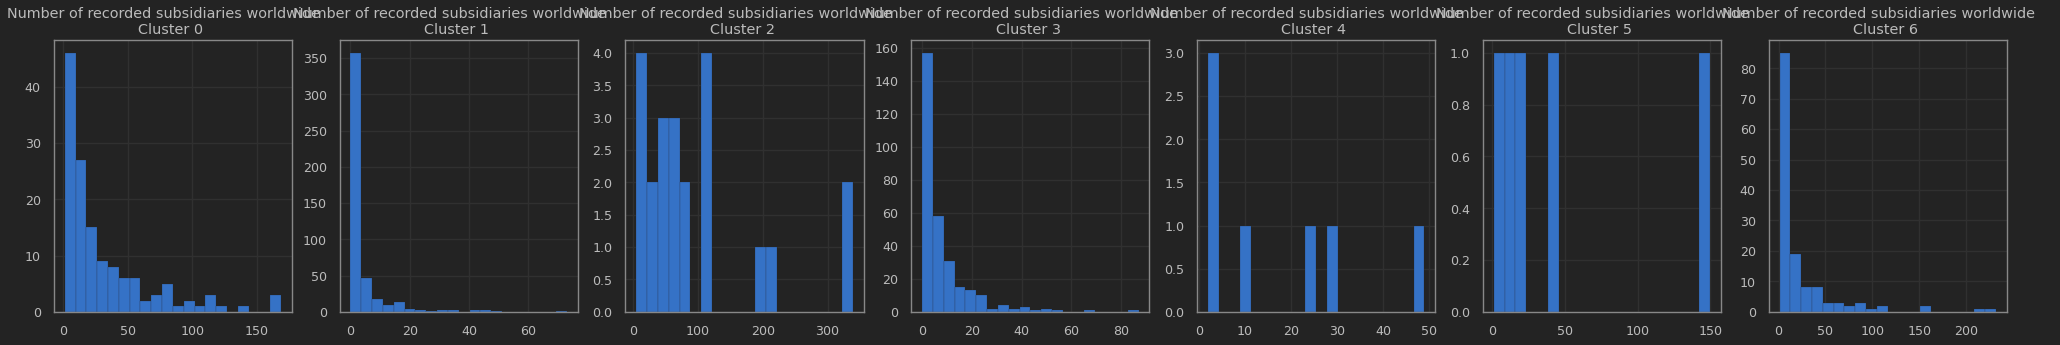

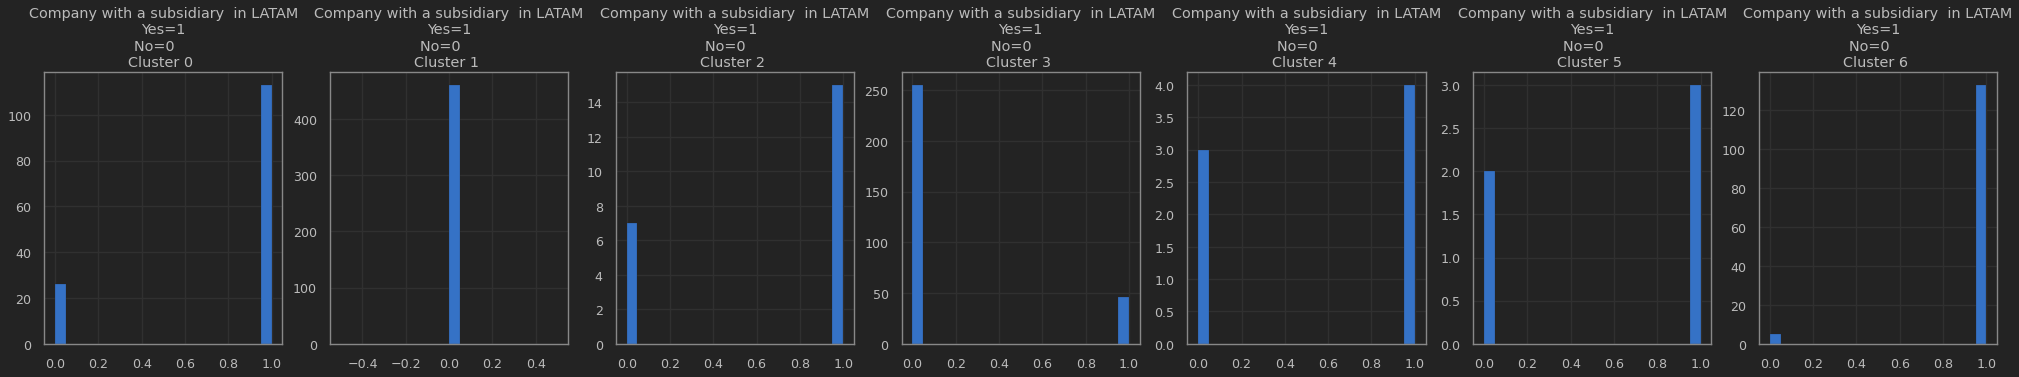

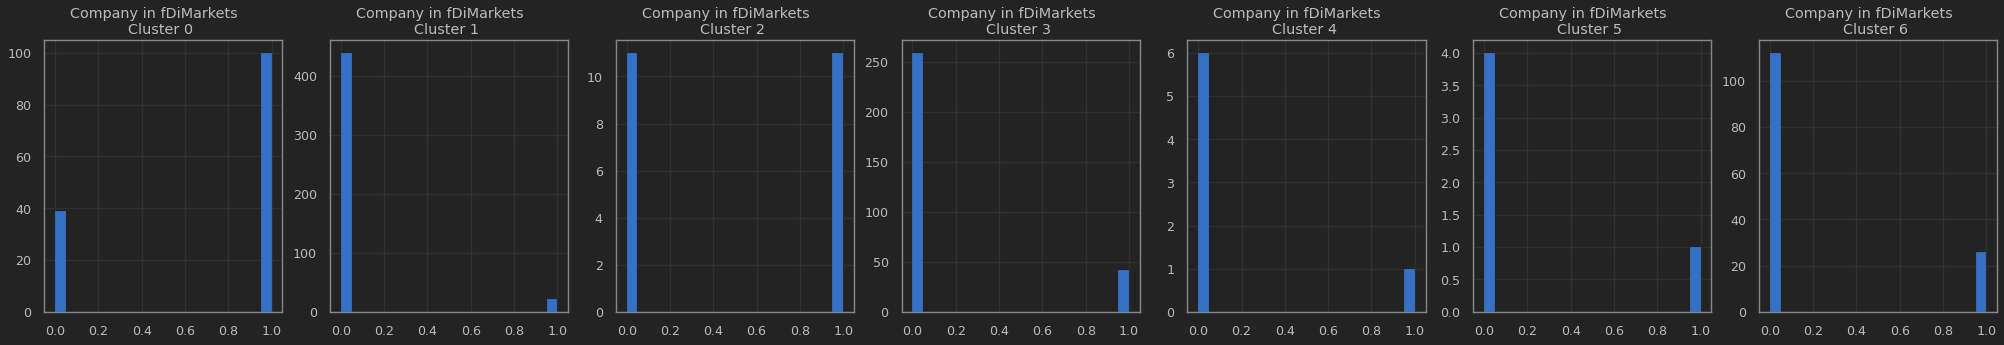

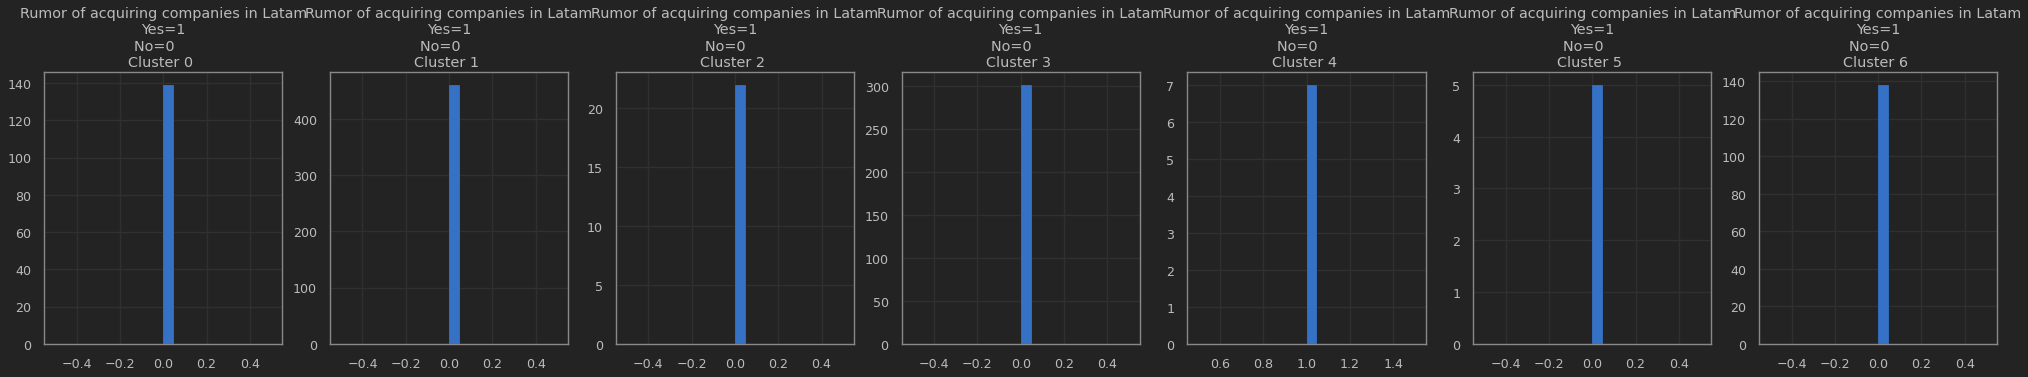

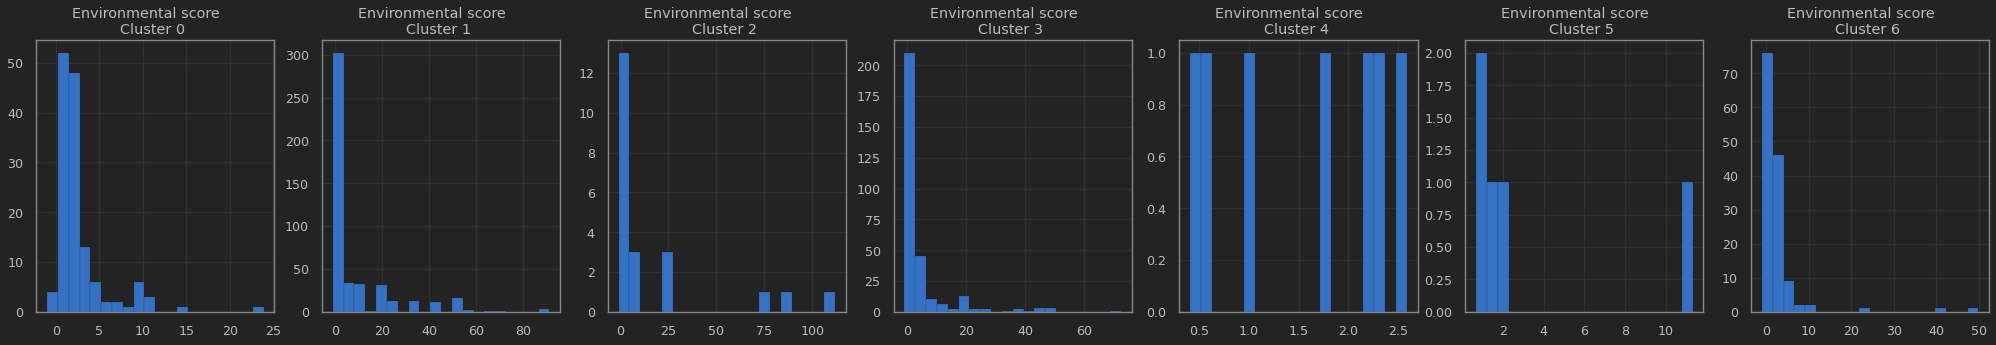

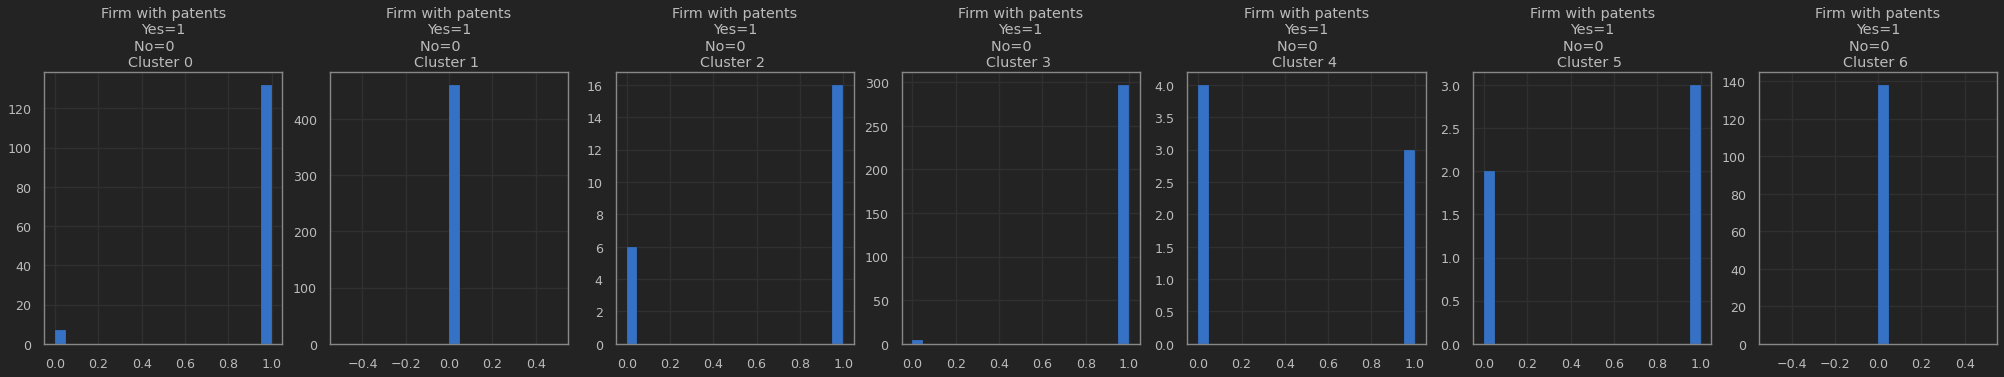

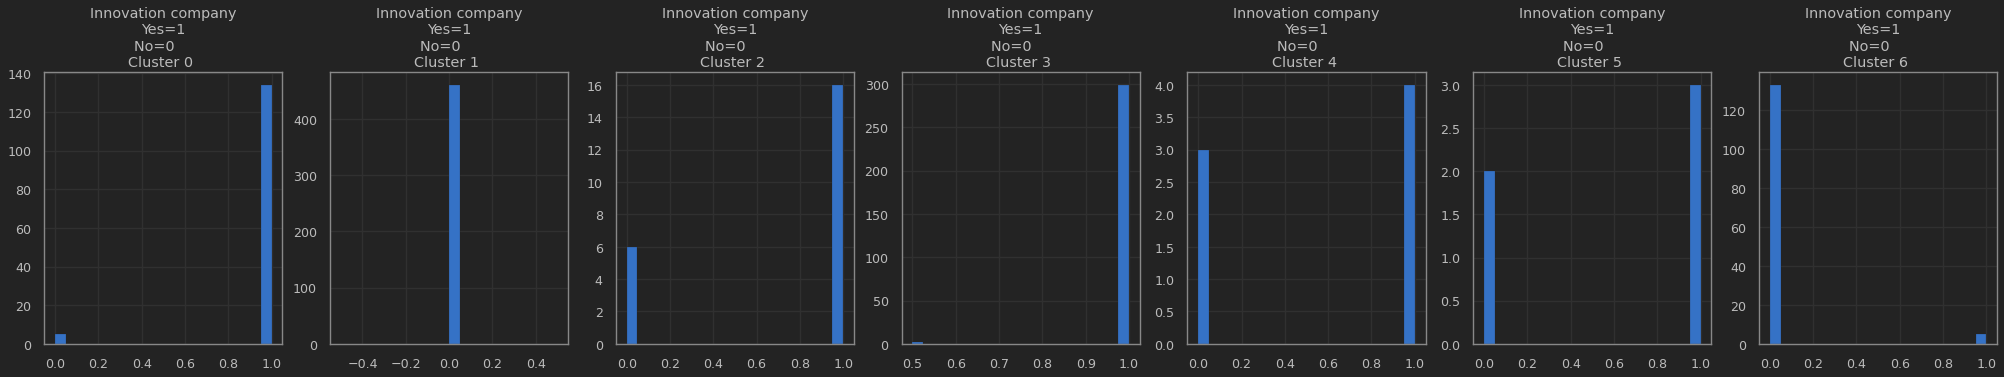

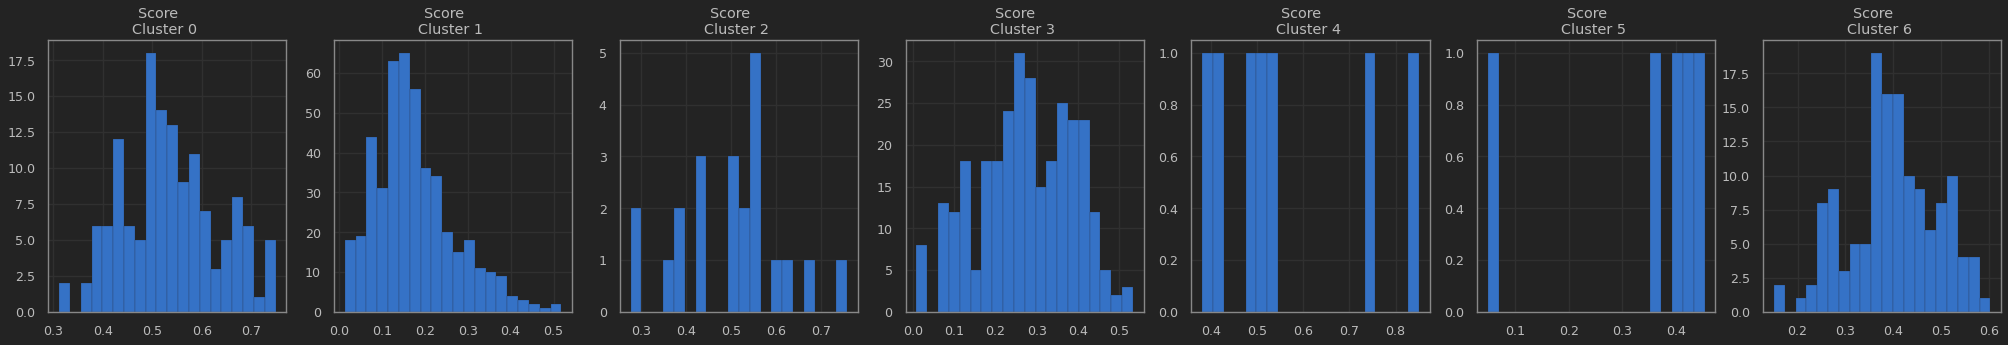

In [109]:
# Plot the histogram de los clusters creados. 
for i in df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(7):
    plt.subplot(1,7,j+1)
    cluster = df_cluster[df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

## Aplicar análisis de componentes principales y visualizar los resultados

In [110]:
# Obtain the principal components. Reducir la cantidad de variables
# que me pueden explicar lo mismo que otras. 
# Voy a obtener sólo dos componentes para graficarlos. 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform( df_scaled )
principal_comp

array([[ 0.53028071, -1.56515257],
       [-0.86555977, -0.08168009],
       [-1.58384582,  0.7161181 ],
       ...,
       [-1.93177326,  0.50787121],
       [-1.90640464,  0.65654626],
       [-1.94862828,  0.6909159 ]])

In [111]:
# Create a dataframe with the two components 'pca1','pca2'
pca_df = pd.DataFrame( data = principal_comp, columns = [ 'pca1' , 'pca2' ])
pca_df.head()

,pca1,pca2
0,0.530281,-1.565153
1,-0.865560,-0.081680
2,-1.583846,0.716118
3,-1.725662,0.678085
4,-0.564696,1.566594


In [112]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,0.530281,-1.565153,3
1,-0.865560,-0.081680,1
2,-1.583846,0.716118,1
3,-1.725662,0.678085,1
4,-0.564696,1.566594,1


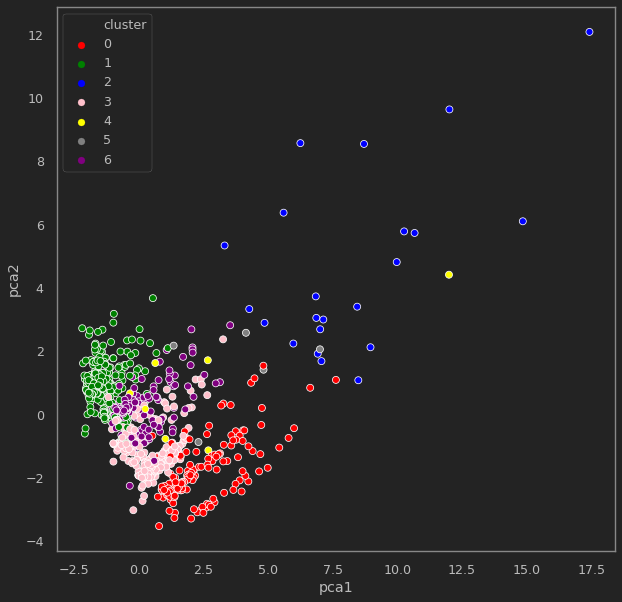

In [113]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple']) #, 'black'
plt.show()

## Exportando los resultados

In [114]:
df_cluster_PCA_results = pd.concat([ df , pca_df.reindex(df.index)], axis=1)

In [ ]:
# Variables que voy a filtrar
columnas = ['ID', 'Proexport  classification', 'Country', 'City', 'Company name',
       'Category company', 'Trade description', 'Nace text description',
       'Sector', 'Director / manager / contact full name', 'E-mail',
       'Telephone number', 'Website address', 'Street', 'Last available year',
       'General ultimate owner of the group', 'Sector priority', 'Score',
       'Potential']

In [117]:
df2 = df_segmentacion[ columnas ]

In [118]:
# Concatenando los resultados. 
df_cluster_PCA_results = pd.concat([ df_cluster_PCA_results , df2.reindex(df_cluster_PCA_results.index)], axis=1)

In [119]:
df_cluster_PCA_results.columns

Index(['Number employees last avail year',
       'Operating revenue last available year\nthousands USD',
       'Total assets last available year\nthousands USD',
       'Profit margin last available year\n%', 'ROE last available year\n%',
       'Credit limit\nthousand USD',
       'Company that export to Colombia\nYes=1\nNo=0',
       'Number of recorded branch locations worldwide',
       'Number of recorded subsidiaries worldwide',
       'Company with a subsidiary  in LATAM\nYes=1\nNo=0',
       'Company in fDiMarkets',
       'Rumor of acquiring companies in Latam\nYes=1\nNo=0',
       'Environmental score', 'Firm with patents\nYes=1\nNo=0',
       'Innovation company\nYes=1\nNo=0', 'Score', 'pca1', 'pca2', 'cluster',
       'Number employees last avail year',
       'Operating revenue last available year\nthousands USD',
       'Total assets last available year\nthousands USD',
       'Profit margin last available year\n%', 'ROE last available year\n%',
       'Credit limit\nth

In [121]:
# Export results
df_cluster_PCA_results.to_excel('results/df_cluster_PCA_results.xlsx')